In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
#import dc_stat_think as dcst
import arch
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,5)

In [5]:
pd.read_csv("JPY.csv")

Date        Open        High         Low       Close   Adj Close  \
0     2018-04-04  106.429001  106.680000  105.995003  106.435997  106.435997   
1     2018-04-05  106.783997  107.481003  106.716003  106.774002  106.774002   
2     2018-04-06  107.081001  107.454002  106.969002  107.052002  107.052002   
3     2018-04-09  106.949997  107.198997  106.852997  106.968002  106.968002   
4     2018-04-10  106.720001  107.392998  106.628998  106.749001  106.749001   
...          ...         ...         ...         ...         ...         ...   
1300  2023-03-29  131.046005  132.697998  130.927994  131.046005  131.046005   
1301  2023-03-30  132.576004  132.932999  132.222000  132.576004  132.576004   
1302  2023-03-31  133.201004  133.563995  132.725998  133.201004  133.201004   
1303  2023-04-03  133.347000  133.731003  132.220993  133.347000  133.347000   
1304  2023-04-04  132.410004  133.169006  131.649994  131.766998  131.766998   

      Volume  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
1300     0.0  
1301     0.0  
1302     0.0  
1303     0.0  
1304     0.0  

[1305 rows x 7 columns]

In [6]:
sns.set()

In [7]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

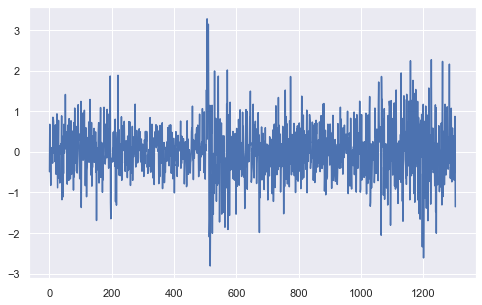

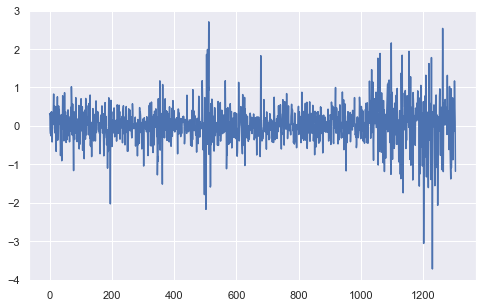

In [8]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

plt.plot(aud1)
plt.show()
plt.plot(jpy1)
plt.show()

### GARCH(1, 1)

In [9]:
model = arch.arch_model(jpy1, vol='GARCH', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6446.853742543004
Iteration:      2,   Func. Count:     15,   Neg. LLF: 16989.083598738645
Iteration:      3,   Func. Count:     25,   Neg. LLF: 93982222.39358966
Iteration:      4,   Func. Count:     31,   Neg. LLF: 835.7481876026044
Iteration:      5,   Func. Count:     37,   Neg. LLF: 813.1701263569508
Iteration:      6,   Func. Count:     43,   Neg. LLF: 290139382.7054477
Iteration:      7,   Func. Count:     49,   Neg. LLF: 810.6638606025494
Iteration:      8,   Func. Count:     54,   Neg. LLF: 810.6676134107474
Iteration:      9,   Func. Count:     60,   Neg. LLF: 810.6632281019355
Iteration:     10,   Func. Count:     65,   Neg. LLF: 810.6631362650861
Iteration:     11,   Func. Count:     69,   Neg. LLF: 810.6631362659135
Optimization terminated successfully    (Exit mode 0)
            Current function value: 810.6631362650861
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 1

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -810.663
Distribution:                  Normal   AIC:                           1629.33
Method:            Maximum Likelihood   BIC:                           1650.02
                                        No. Observations:                 1304
Date:                Mon, Jun 05 2023   Df Residuals:                     1303
Time:                        19:33:06   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0200  1.141e-02      1.748  8.042e-02 [-2.416e-03,4.232e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.5240e-03  2.354e-03      1.922  5.459e-02 [-8.905e-05,9.137e-03]
alpha[1]       0.0813  2.271e-02      3.578  3.457e-04    [3.676e-02,  0.126]
beta[1]        0.9027  2.813e-02     32.087 6.651e-226      [  0.848,  0.958]
=============================================================================

Covariance estimator: robust
"""

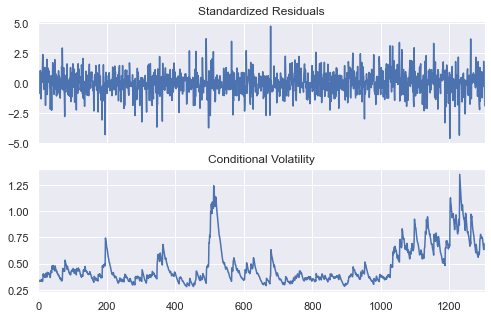

In [13]:
fig = results.plot()
plt.show()

In [40]:
c_0 = 4.524*10**(-3)
c_1 = 0.0813
b_1 = 0.9027

L = jpy1

In [61]:
sigmaz = np.zeros(len(L))
sigmaz[0] = 0.2

for t in range(1, len(L)):
    sigmaz[t] = np.sqrt(c_0 + c_1*L[t-1]**2 + b_1*sigmaz[t-1]**2) 

In [62]:
sigmaz

array([0.2       , 0.22097733, 0.23262623, ..., 0.68832441, 0.67103138,
       0.64184987])

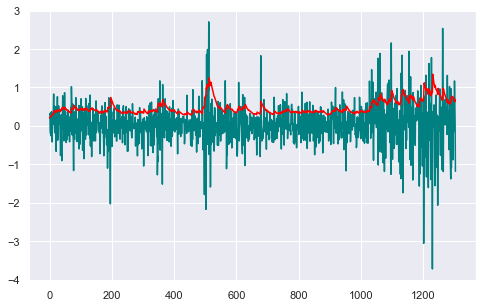

In [63]:
plt.plot(jpy1, color = "teal")
plt.plot(sigmaz, color = "red")

In [64]:
L_filtr = np.zeros(len(L))

for i in range(len(L)):
    L_filtr[i] = L[i]/sigmaz[i]

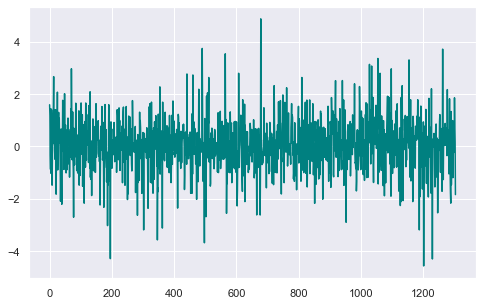

In [65]:
plt.plot(L_filtr, color = "teal")

In [76]:
print("Kwantyl rzędu 0.95: ", np.quantile(L_filtr, 0.95))
print("Kwantyl rzędu 0.99: ", np.quantile(L_filtr, 0.99))

Kwantyl rzędu 0.95:  1.6288264361468137
Kwantyl rzędu 0.99:  2.7247893771777267


In [94]:
sigma = c_0 + c_1*list(L)[-1]**2 + b_1*sigmaz[-1]**2

In [104]:
VaR_095 = sigma*np.quantile(L_filtr, 0.95) 
VaR_095

0.7990221756258059

In [105]:
VaR_099 = sigma*np.quantile(L_filtr, 0.99)
VaR_099

1.3366477163920452

0.017683698574565847